


###############################################
EPOCH:  500
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2548.876586759912
Testing r2:  0.6783288169359356
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2563.037789040646
Testing r2:  0.6747445674016463
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2635.8918237462917
Testing r2:  0.6559910780475784
___________________________________________

Training for learning rate 0.001.
Testing rmse:  5057.587419304047
Testing r2:  -0.26648875094337954


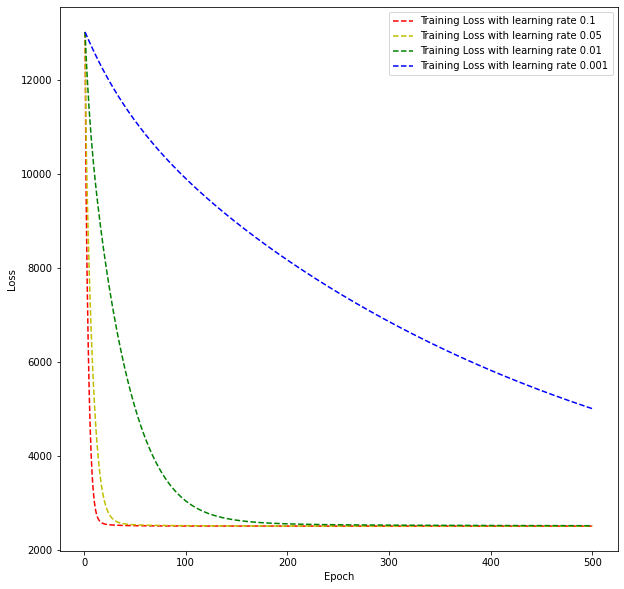




###############################################
EPOCH:  1000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.765569812117
Testing r2:  0.6791135656311058
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2548.913108770738
Testing r2:  0.6783195986295975
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2600.762439601082
Testing r2:  0.6650994126876717
___________________________________________

Training for learning rate 0.001.
Testing rmse:  3075.0753218474856
Testing r2:  0.5318057709538059


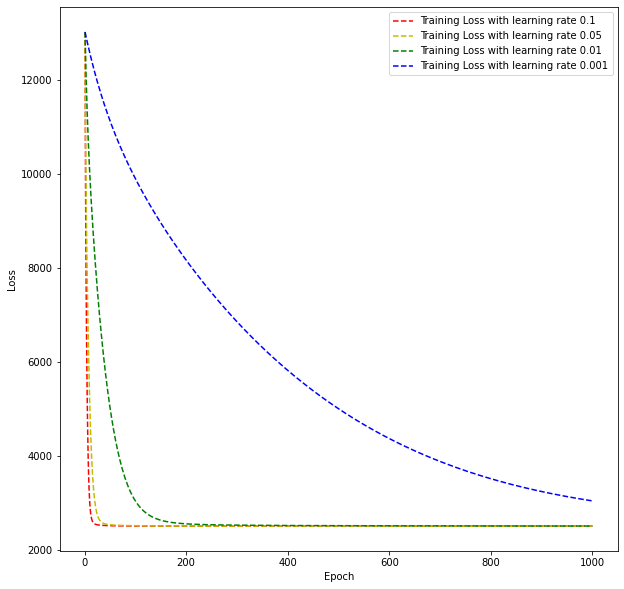




###############################################
EPOCH:  2000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.766329287482
Testing r2:  0.6791133741717028
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2545.7690468248647
Testing r2:  0.6791126890955772
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2570.351893474757
Testing r2:  0.6728855650857375
___________________________________________

Training for learning rate 0.001.
Testing rmse:  2629.457077927659
Testing r2:  0.6576686188457579


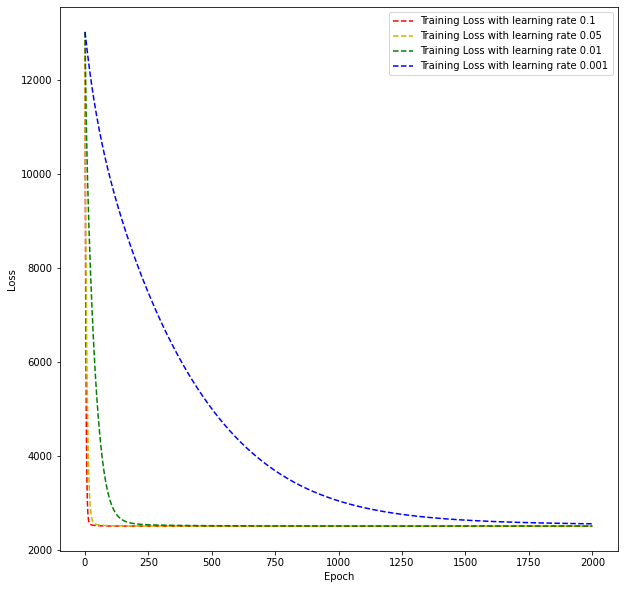




###############################################
EPOCH:  4000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.7726804678687
Testing r2:  0.6791117730731548
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2545.766312580824
Testing r2:  0.6791133783833565
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2552.0342338900177
Testing r2:  0.6775313257961069
___________________________________________

Training for learning rate 0.001.
Testing rmse:  2640.6348634369665
Testing r2:  0.6547519407243634


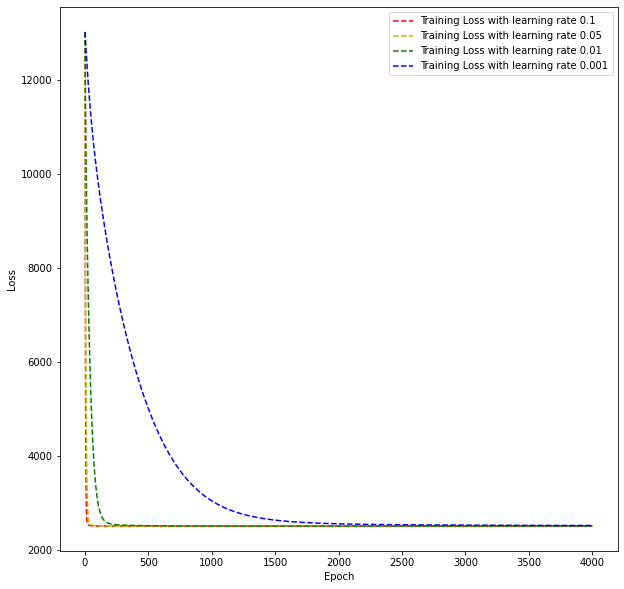




###############################################
EPOCH:  8000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.772686793889
Testing r2:  0.6791117714783971
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2545.7726802968555
Testing r2:  0.6791117731162666
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2546.05670580765
Testing r2:  0.6790401677232085
___________________________________________

Training for learning rate 0.001.
Testing rmse:  2612.856731987645
Testing r2:  0.6619774025495218


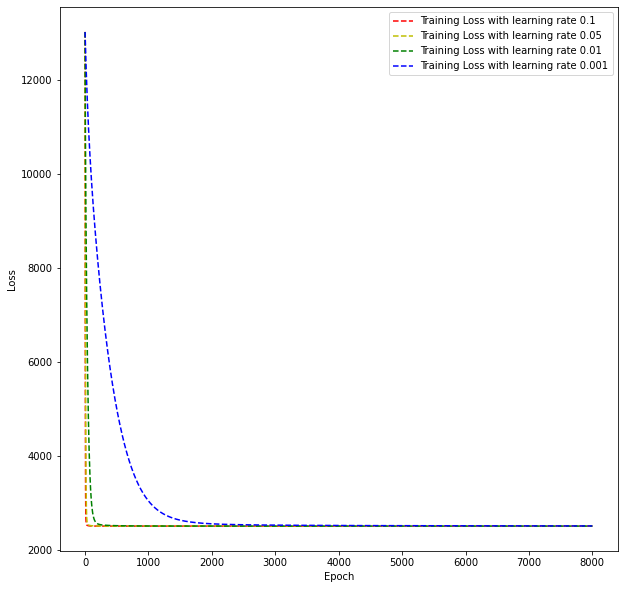




###############################################
EPOCH:  10000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.7726867938914
Testing r2:  0.6791117714783964
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2545.7726865997756
Testing r2:  0.679111771527332
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2545.7691822516035
Testing r2:  0.6791126549552272
___________________________________________

Training for learning rate 0.001.
Testing rmse:  2600.8439567644314
Testing r2:  0.6650784184028359


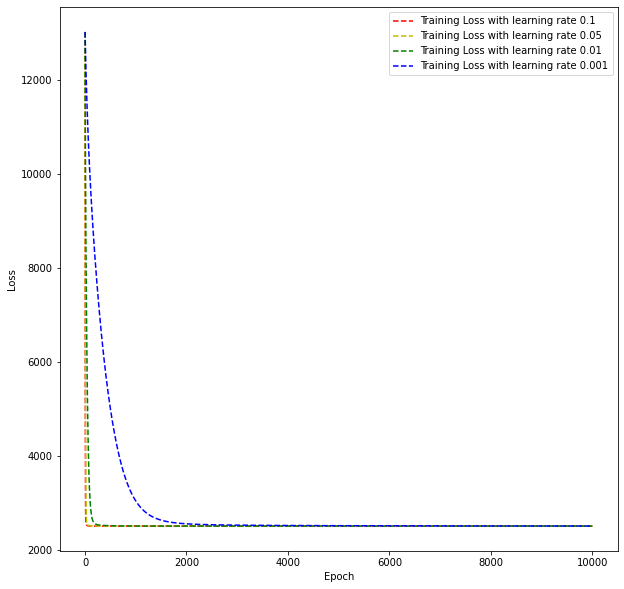




###############################################
EPOCH:  20000
___________________________________________

Training for learning rate 0.1.
Testing rmse:  2545.772686793891
Testing r2:  0.6791117714783965
___________________________________________

Training for learning rate 0.05.
Testing rmse:  2545.772686793887
Testing r2:  0.6791117714783977
___________________________________________

Training for learning rate 0.01.
Testing rmse:  2545.766182327163
Testing r2:  0.6791134112195645
___________________________________________

Training for learning rate 0.001.
Testing rmse:  2570.299445539589
Testing r2:  0.6728989144653924


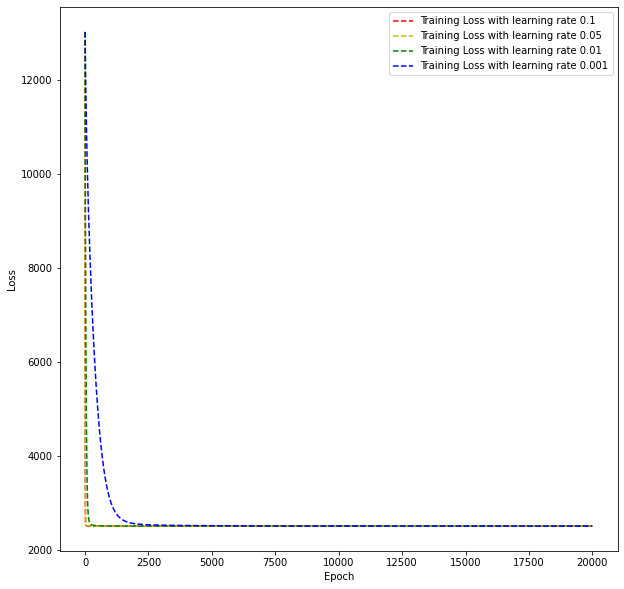

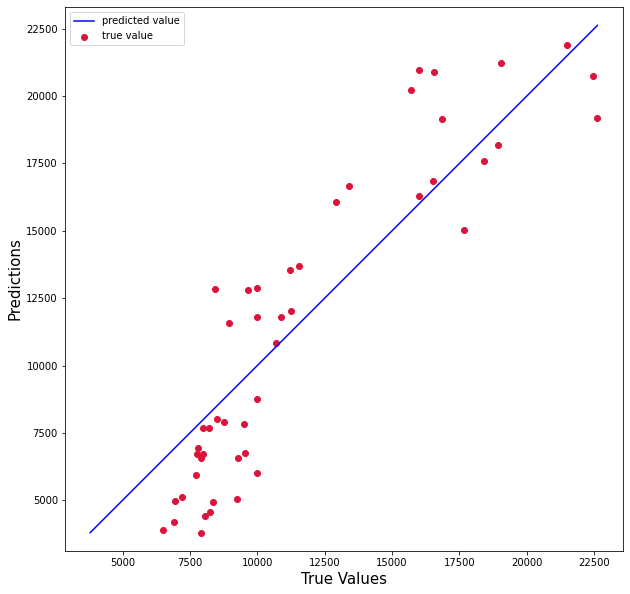

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import math


class Data:
  def __init__(self, loc):
    self.data = pd.read_csv(loc)
    header = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
    self.data.columns = header
    self.__processData()
    self.__setFeatureAndTarget()

  #return whole data set
  def getData(self):
    return self.data

  #private preprocessing function
  def __processData(self):

    self.data.replace('?',np.nan, inplace=True)
    self.data.dropna(inplace=True)

    self.data['normalized-losses'] = self.data['normalized-losses'].astype('int')
    self.data['bore'] = self.data['bore'].astype('float')
    self.data['stroke'] = self.data['stroke'].astype('float')
    self.data['horsepower'] = self.data['horsepower'].astype('float')
    self.data['peak-rpm'] = self.data['peak-rpm'].astype('int')
    self.data['price'] = self.data['price'].astype('int')
    self.data = self.data.select_dtypes(exclude=['object'])

  #private set data to required features and target
  def __setFeatureAndTarget(self):  
    self.data = self.data[["highway-mpg", "city-mpg", "wheel-base", "width", "length", "curb-weight", "horsepower", "engine-size", "price"]]

  def getDataSplit(self):  
    train_size = int(0.7 * len(self.data))

    train_set = self.data[:train_size]
    test_set = self.data[train_size:]
    X_train = train_set.iloc[:, :-1]
    X_test = test_set.iloc[:, :-1]
    Y_train = train_set.iloc[:, -1]
    Y_test = test_set.iloc[:, -1]
    
    X_train = (X_train - (np.mean(X_train)))/np.std(X_train)
    X_test = (X_test - (np.mean(X_test)))/np.std(X_test)

    return (X_train, X_test, Y_train, Y_test)



class Model:
  #initialize model
  def __init__(self, X, Y):
    self.weights  = np.random.randn(X.shape[1])
    self.X = X.to_numpy()
    self.Y = Y.to_numpy()
    self.training_loss = []
    self.bias = 0

  #update the weights and bias
  def update(self, Y_pred, alpha):  

    n = len(self.Y)
    weight_gradient = 0.0
    bias_gradient = 0.0

    for i in range(n):
      weight_gradient += (-2/float(n)) * self.X[i].T.dot(self.Y[i]-Y_pred[i])
      bias_gradient += (-2/float(n)) * (self.Y[i]-Y_pred[i])

    self.weights = self.weights - (alpha * weight_gradient)  
    self.bias = self.bias - (alpha * bias_gradient)


  #train model for specified epochs
  def train(self, alpha, epoch):  
    training_loss = []
    for _ in range(epoch):
      Y_pred = self.predict(self.X)
      self.update(Y_pred, alpha)
      self.training_loss.append(self.loss(self.Y,  Y_pred))



  #returns set of training loss on every iteration
  def getTraining_loss(self):
    return self.training_loss;
           
  #based on current weights and bias predict the target for our dataset        
  def  predict(self, X):
    Y_pred=[]
    n = len(X)
    Y_pred = X.dot(self.weights) + self.bias 
    return np.array(Y_pred)      

  #returns root mean squared error
  def loss(self, Y, Y_pred):
      n = len(Y)
      l = 0
      for i in range(n):
          l+=(Y[i]-Y_pred[i])**2
      return math.sqrt((1/n)*l)
      
  #returns r2 of the model 
  def r2(self, X, Y):
    Y_pred = self.predict(X)   
    rss = np.sum((Y_pred - Y) ** 2)
    tss = np.sum((Y-Y.mean()) ** 2)
    r2score = 1-(rss/tss)
    return r2score
    #return r2_score(Y, self.predict(X)) #TODO: write r2 function without sklearn


if __name__ == "__main__":

  alpha = [0.1, 0.05, 0.01, 0.001]
  epochs = [500, 1000, 2000, 4000, 8000, 10000, 20000]
  
  for epoch in epochs:
    epoch_count = range(1, epoch + 1)
    training_losses = []
    print("\n\n")
    print("###############################################")
    print("EPOCH: ", epoch)
    for a in alpha:
      print("___________________________________________\n")
      print("Training for learning rate {}.".format(a))
      #clean and process data
      data = Data('https://raw.githubusercontent.com/kunal4104/CS6375/master/imports-85.data') 

      #split into training and testing sets
      X_train, X_test, Y_train, Y_test = data.getDataSplit()
      Y_test = Y_test.to_numpy()

      #train model 
      linearRegression = Model(X_train, Y_train)
      linearRegression.train(a, epoch)
    
      #predictions for test set
      Y_test_pred = linearRegression.predict(X_test)
    
      #evaluation for test set
      r2= linearRegression.r2(X_test, Y_test)
      rmse = linearRegression.loss(Y_test, Y_test_pred)
      print("Testing rmse: ", rmse)
      print("Testing r2: ", r2)
  
      training_losses.append(linearRegression.getTraining_loss())
  
      
    pl.figure(figsize=(10,10))
    pl.xlabel('Epoch')
    pl.ylabel('Loss')
    pl.plot(epoch_count, training_losses[0], 'r--')
    pl.plot(epoch_count, training_losses[1], 'y--')
    pl.plot(epoch_count, training_losses[2], 'g--')
    pl.plot(epoch_count, training_losses[3], 'b--')
    pl.legend(["Training Loss with learning rate {}".format(0.1), "Training Loss with learning rate {}".format(0.05), "Training Loss with learning rate {}".format(0.01), "Training Loss with learning rate {}".format(0.001)])
    pl.show()

  #plot of expected value and predicted value on test set
  pl.figure(figsize=(10,10))
  pl.scatter(Y_test, Y_test_pred, c='crimson')
  p1 = max(max(Y_test_pred), max(Y_test))
  p2 = min(min(Y_test_pred), min(Y_test))
  pl.plot([p1, p2], [p1, p2], 'b-')
  pl.legend(["predicted value",  "true value"])
  pl.xlabel('True Values', fontsize=15)
  pl.ylabel('Predictions', fontsize=15)
  pl.axis('equal')   
  pl.show()